In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('wine.csv')

In [4]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [9]:
scaled_df=scale(df.iloc[:,:14])

In [10]:
model=PCA(n_components=8)

In [11]:
q1=model.fit_transform(scaled_df)
q1

array([[-3.5229339 , -1.45309844, -0.16479549, ..., -0.30071618,
         0.57387557,  0.05563728],
       [-2.52885806,  0.33001925, -2.02670665, ..., -0.88430941,
        -0.02971648,  1.01037189],
       [-2.78502898, -1.03693595,  0.9832377 , ...,  0.46884161,
         0.4883054 , -0.26895705],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304, ...,  0.00529036,
         0.73302611,  0.05254455],
       [ 2.75522166, -2.29378408, -0.55047368, ...,  1.01256231,
         0.75542325,  0.42651198],
       [ 3.49633565, -2.76060799,  1.01315115, ...,  0.37722337,
         0.01530664, -0.32500213]])

In [12]:
exp_model=model.explained_variance_ratio_
exp_model

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244])

In [13]:
np.cumsum(exp_model)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217])

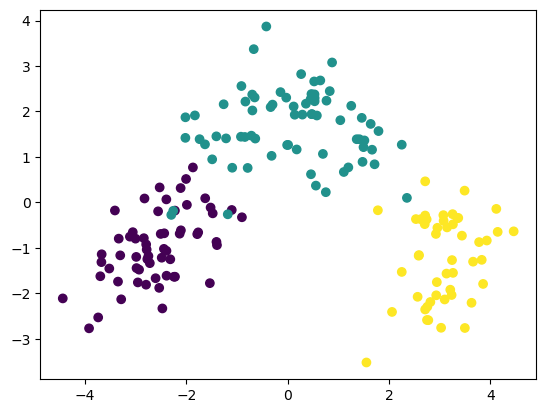

In [14]:
plt.scatter(q1[:,0],q1[:,1],c=df['Type'])

# Clustering the data

## K Mean

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, completeness_score

In [16]:
scaler=StandardScaler()
scaled_q1=scaler.fit_transform(q1)
scaled_q1

array([[-1.49729886, -0.91955802, -0.13704084, ..., -0.36662392,
         0.77115498,  0.09403957],
       [-1.07480196,  0.20884466, -1.68537133, ..., -1.07812284,
        -0.03993202,  1.70775685],
       [-1.18367838, -0.6561997 ,  0.81764207, ...,  0.57159727,
         0.65616862, -0.4545982 ],
       ...,
       [ 1.28663542, -1.74409305, -0.7823542 , ...,  0.00644984,
         0.9850162 ,  0.08881217],
       [ 1.17100983, -1.45156548, -0.45776361, ...,  1.23448483,
         1.01511274,  0.72090164],
       [ 1.48599421, -1.74698364,  0.84251754, ...,  0.45989913,
         0.02056856, -0.54932705]])

In [17]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(scaled_q1)

KMeans(n_clusters=2, random_state=42)

In [18]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
model.inertia_

1266.0343060122664

In [20]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(scaled_q1)
    wcss.append(model.inertia_)

In [21]:
wcss

[1424.0,
 1266.0343060122664,
 1117.5409395960182,
 1025.4059285231542,
 955.4625413260204,
 890.7832781694046,
 815.9874109733213,
 775.5776537064622,
 722.1112176357609,
 679.1837949881957]

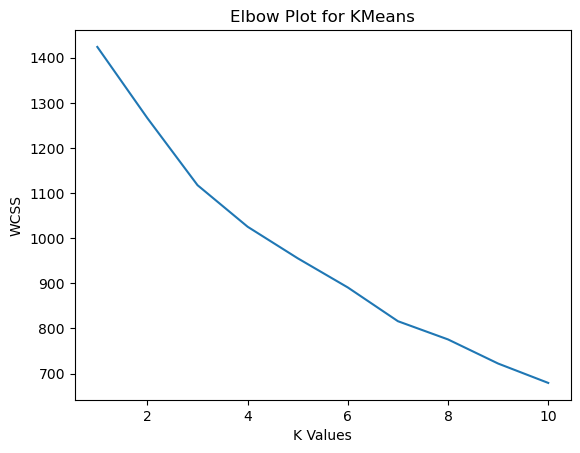

In [22]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Plot for KMeans')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

In [24]:
final_model = KMeans(n_clusters=5, random_state=42)
final_model.fit(scaled_q1)
labels = final_model.labels_

In [25]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3,
       3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       4, 3, 2, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 2, 2,
       0, 2, 0, 0, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 2, 2, 2, 0, 4, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0,
       0, 0])

In [32]:
df['Label'] = labels
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,4
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [30]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


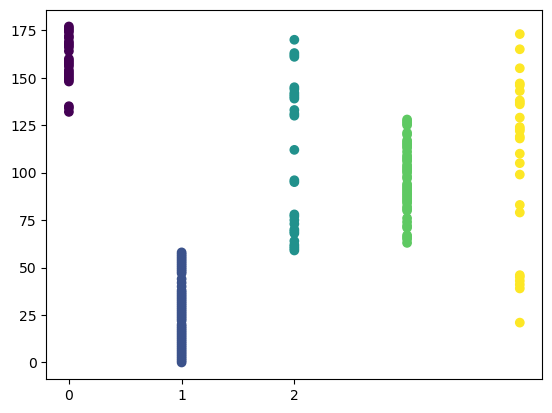

In [34]:
plt.scatter(df['Label'], df.index, c=labels, cmap='viridis')
plt.xticks([0,1,2])
plt.show()

In [37]:
grp = df.groupby(['Label'])
grp

In [38]:
for x,y in grp:
    print(y)
    print('_________________________________________________________________________')

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
132     3    12.81   2.31  2.40        24.0         98     1.15        1.09   
134     3    12.51   1.24  2.25        17.5         85     2.00        0.58   
135     3    12.60   2.46  2.20        18.5         94     1.62        0.66   
148     3    13.32   3.24  2.38        21.5         92     1.93        0.76   
149     3    13.08   3.90  2.36        21.5        113     1.41        1.39   
150     3    13.50   3.12  2.62        24.0        123     1.40        1.57   
151     3    12.79   2.67  2.48        22.0        112     1.48        1.36   
152     3    13.11   1.90  2.75        25.5        116     2.20        1.28   
153     3    13.23   3.30  2.28        18.5         98     1.80        0.83   
154     3    12.58   1.29  2.10        20.0        103     1.48        0.58   
156     3    13.84   4.12  2.38        19.5         89     1.80        0.83   
157     3    12.45   3.03  2.64        27.0         

In [39]:
grp.agg(['mean','min','max'])

Type            Alcohol                   Malic              \
           mean min max       mean    min    max      mean   min   max   
Label                                                                    
0      3.000000   3   3  13.228077  12.36  14.34  2.944231  1.24  4.60   
1      1.000000   1   1  13.746226  12.85  14.83  1.799811  1.35  3.10   
2      2.464286   2   3  12.645714  11.66  13.69  2.265714  0.94  3.88   
3      2.000000   2   2  12.218667  11.03  13.86  1.572000  0.74  2.83   
4      2.115385   1   3  12.988846  11.46  14.38  4.221154  2.55  5.80   

            Ash  ...  Color       Hue              Dilution              \
           mean  ...    max      mean   min   max      mean   min   max   
Label            ...                                                      
0      2.458462  ...  13.00  0.630385  0.48  0.85  1.601538  1.30  1.96   
1      2.463962  ...   8.90  1.077358  0.86  1.28  3.141321  2.51  4.00   
2      2.306786  ...   8.21  0.964857  0.60  1.45  2.093929  1.29  3.50   
3      2.261333  ...   6.00  1.067778  0.69  1.71  2.925111  2.06  3.69   
4      2.322308  ...   7.90  0.841154  0.54  1.42  2.557308  1.27  3.64   

           Proline             
              mean  min   max  
Label                          
0       633.653846  425   880  
1      1140.320755  735  1680  
2       649.107143  355   985  
3       492.844444  278   886  
4       603.153846  315  1080  

[5 rows x 42 columns]

In [40]:
silhouette_score(df.iloc[:,0:6], labels)

-0.022437441619215952

## Hierarchical

In [41]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [42]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_q1[0:5,:]

array([[-1.49729886, -0.91955802, -0.13704084, -0.01377871,  0.78713055,
        -0.36662392,  0.77115498,  0.09403957],
       [-1.07480196,  0.20884466, -1.68537133, -0.43304359, -0.30233618,
        -1.07812284, -0.03993202,  1.70775685],
       [-1.18367838, -0.6561997 ,  0.81764207,  0.68954927, -0.41373316,
         0.57159727,  0.65616862, -0.4545982 ],
       [-1.66715791, -1.75179456, -0.14550025,  0.58662584, -0.34626032,
         0.32017386, -0.5353085 ,  1.0459857 ],
       [-0.59821298, -0.5491491 ,  1.68464189, -0.45771069,  0.24334026,
        -0.72389653,  0.60184033,  0.73514234]])

In [43]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
model.fit(scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [44]:
labels = model.labels_
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1,
       4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4,
       4, 4], dtype=int64)

In [45]:
df['Labels'] = labels
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Label,Labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,3


In [46]:
grp = df.groupby(df['Labels'])
grp

In [47]:
for x,y in grp:
    print(y)
    print("_____________________________________________________________________")

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
21      1    12.93   3.80  2.65        18.6        102     2.41        2.41   
39      1    14.22   3.99  2.51        13.2        128     3.00        3.04   
41      1    13.41   3.84  2.12        18.8         90     2.45        2.68   
43      1    13.24   3.98  2.29        17.5        103     2.64        2.63   
45      1    14.21   4.04  2.44        18.9        111     2.85        2.65   
46      1    14.38   3.59  2.28        16.0        102     3.25        3.17   
63      2    12.37   1.13  2.16        19.0         87     3.50        3.10   
66      2    13.11   1.01  1.70        15.0         78     2.98        3.18   
69      2    12.21   1.19  1.75        16.8        151     1.85        1.28   
71      2    13.86   1.51  2.67        25.0         86     2.95        2.86   
73      2    12.99   1.67  2.60        30.0        139     3.30        2.89   
74      2    11.96   1.09  2.30        21.0        1

In [48]:
grp.agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Labels,,,,,,,,,,,,,,,
0,1.769231,12.617692,2.730385,2.326923,20.042308,104.307692,2.741923,2.662692,0.283077,2.103077,3.584615,0.986154,3.126154,663.153846,3.346154
1,3.000000,13.065909,3.794091,2.411818,20.863636,97.772727,1.567727,0.660000,0.450000,0.924091,5.551818,0.744545,1.780455,625.454545,2.818182
2,2.000000,12.276863,1.754314,2.219020,19.976471,90.921569,2.072353,1.864510,0.393529,1.406078,3.026078,1.076784,2.672549,490.843137,2.862745
3,1.000000,13.746226,1.799811,2.463962,17.022642,106.377358,2.848491,3.007170,0.292453,1.913585,5.618679,1.077358,3.141321,1140.320755,1.000000
4,3.000000,13.228077,2.944231,2.458462,21.884615,100.615385,1.772692,0.884231,0.445385,1.347692,8.956923,0.630385,1.601538,633.653846,0.000000


In [50]:
from scipy.cluster import hierarchy

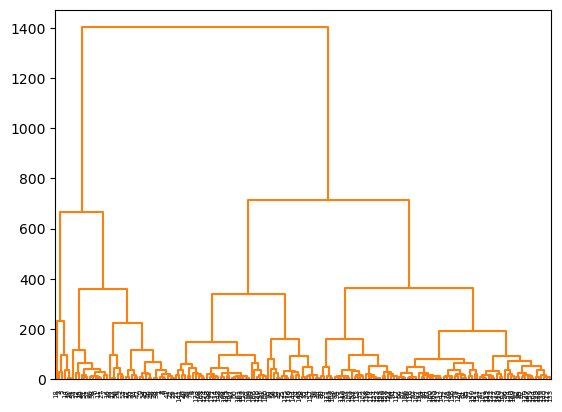

In [53]:
hr = hierarchy.linkage(df.iloc[:,0:14], method='complete')
dn = hierarchy.dendrogram(hr, color_threshold=50000)